In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Plot Acc - Mask ratio

In [72]:
os.makedirs("./plots", exist_ok=True)

In [73]:
# Get only the low_lr data for the test_classification
df = pd.read_csv("wandb_export.csv")
df = df[df["Tags"].str.contains("low lr")]
df = df[df["Name"].str.contains("test_classification")]

In [74]:
# Set mask_ratio for baseline to 0
df.loc[df["Name"].str.contains("baseline"), "model.mask_ratio"] = 0

In [75]:
# Pick out each dataset and sort by mask_ratio
df_nette = df[df["Tags"].str.contains("imagenette")].sort_values(by="model.mask_ratio")
df_woof = df[df["Tags"].str.contains("imagewoof")].sort_values(by="model.mask_ratio")

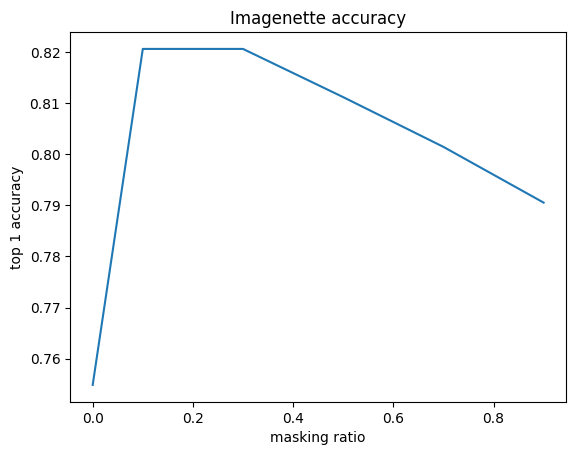

In [48]:
plt.plot(df_nette["model.mask_ratio"], df_nette["acc_k_1"].astype(float))
plt.title("Imagenette accuracy")
plt.ylabel("top 1 accuracy")
plt.xlabel("masking ratio")
plt.savefig("./plots/nette_mask_ratio_acc.png", dpi=300)

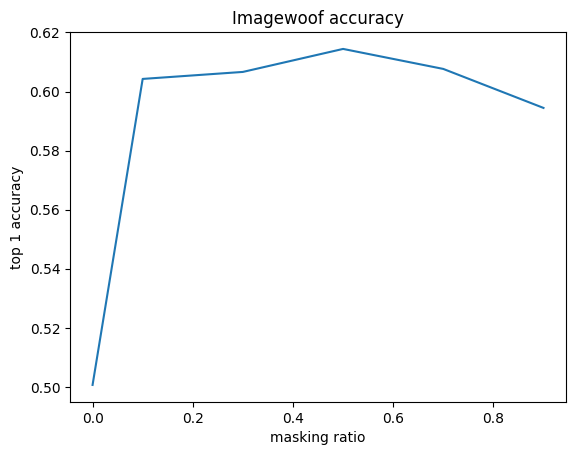

In [47]:
plt.plot(df_woof["model.mask_ratio"], df_woof["acc_k_1"].astype(float))
plt.title("Imagewoof accuracy")
plt.ylabel("top 1 accuracy")
plt.xlabel("masking ratio")
plt.savefig("./plots/woof_mask_ratio_acc.png", dpi=300)

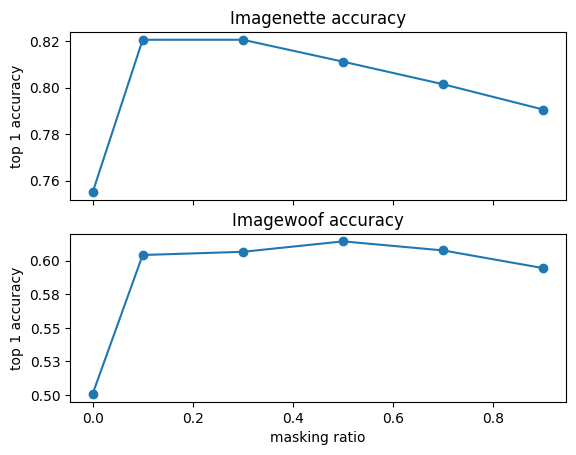

In [81]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(df_nette["model.mask_ratio"], df_nette["acc_k_1"].astype(float), "-o")
axs[0].set_title("Imagenette accuracy")
axs[0].set_ylabel("top 1 accuracy")
axs[1].plot(df_woof["model.mask_ratio"], df_woof["acc_k_1"].astype(float), "-o")
axs[1].set_title("Imagewoof accuracy")
axs[1].set_ylabel("top 1 accuracy")
axs[1].set_xlabel("masking ratio")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig("./plots/combined_mask_ratio_acc.png", dpi=300)

## Plot Acc - Blocks finetuned

In [90]:
df = pd.read_csv("wandb_export.csv")
df = df[df["Tags"].str.contains("imagenette")]
df = df[df["Tags"].str.contains("probing")]
df = df[df["Name"].str.contains("test_classification")]

In [91]:
df["blocks"] = df["Name"].str[18].astype(int)
df = df.sort_values(by="blocks")


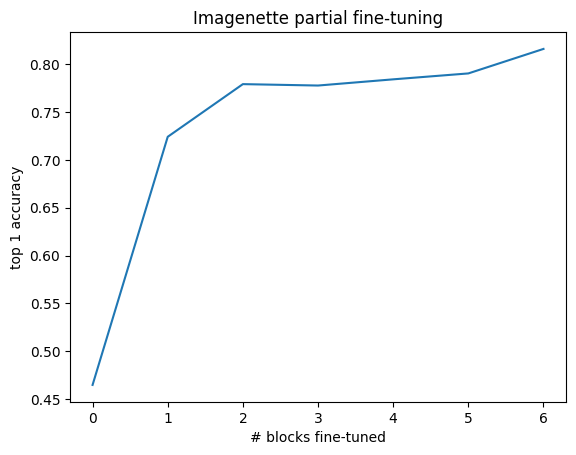

<Figure size 640x480 with 0 Axes>

In [92]:
plt.plot(df["blocks"], df["acc_k_1"].astype(float))
plt.title("Imagenette partial fine-tuning")
plt.ylabel("top 1 accuracy")
plt.xlabel("# blocks fine-tuned")
plt.show()
plt.savefig("./plots/nette_blocks_acc.png", dpi=300)

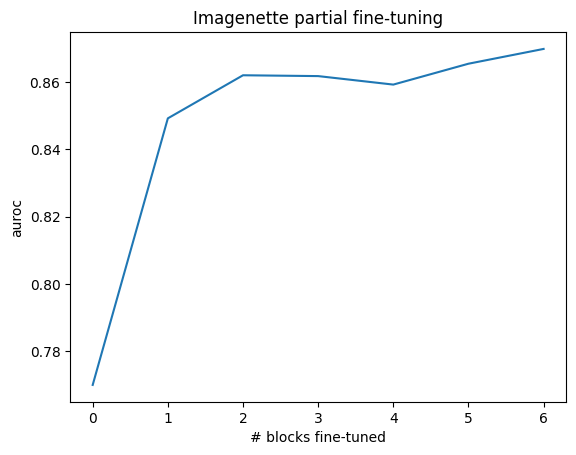

<Figure size 640x480 with 0 Axes>

In [93]:
plt.plot(df["blocks"], df["auroc"].astype(float))
plt.title("Imagenette partial fine-tuning")
plt.ylabel("auroc")
plt.xlabel("# blocks fine-tuned")
plt.show()
plt.savefig("./plots/nette_blocks_auroc.png", dpi=300)

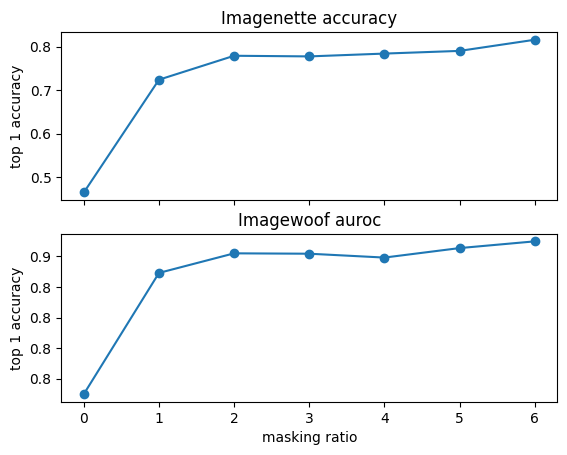

In [96]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(df["blocks"], df["acc_k_1"].astype(float), "-o")
axs[0].set_title("Imagenette accuracy")
axs[0].set_ylabel("top 1 accuracy")
axs[1].plot(df["blocks"], df["auroc"].astype(float), "-o")
axs[1].set_title("Imagewoof auroc")
axs[1].set_ylabel("auroc")
axs[1].set_xlabel("masking ratio")
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.savefig("./plots/combined_blocks_acc.png", dpi=300)